<a href="https://colab.research.google.com/github/nicbmoura/hd-EMG-dataset-merge/blob/main/fun%C3%A7%C3%B5es_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

import scipy.io
import mat73

from scipy.io import loadmat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = 'data/raw/'

In [ ]:


db1 = pd.read_csv(path+'[1] Dados/hdEMG/S01/S01_baseline.csv')

display(db1)

,Time,MA1,MA2,MA3,MA4,MA5,MA6,MA7,MA8,MA9,...,MN7,MN8,MN9,soleus_proximal,soleus_distal,reference_medialEpicondyle,torque,trigger,angular_position,angular_velocity
0,0.0000,-145497.0625,-88394.8828,-97087.0547,-96608.3984,-92151.1563,-108133.3438,-99182.6484,-93805.9688,-115558.7422,...,-105270.8203,-104769.3828,-132992.5156,3452.6030,10098.0596,-237.8589,-37983.5469,-588.5623,-177776.3594,-1853.5618
1,0.4883,-145493.8125,-88388.4141,-97082.6484,-96602.8359,-92145.4688,-108126.2813,-99176.3047,-93800.3438,-115553.2734,...,-105265.0078,-104766.4141,-132986.4531,3457.1968,10103.6846,-231.5777,-37959.5469,-565.3123,-177764.7344,-1846.4368
2,0.9766,-145491.5000,-88385.0391,-97079.8359,-96599.9609,-92142.4375,-108121.5000,-99175.5859,-93798.6563,-115548.6797,...,-105261.7891,-104764.1016,-132983.1406,3459.3843,10107.2471,-229.2652,-37965.4219,-554.6873,-177770.9844,-1862.6868
3,1.4648,-145475.7500,-88372.7578,-97066.8984,-96587.4922,-92129.6875,-108108.7188,-99166.3984,-93784.0313,-115534.8672,...,-105247.8203,-104751.8203,-132969.8281,3474.3218,10120.5283,-217.4840,-37970.1719,-544.9373,-177782.1094,-1880.4368
4,1.9531,-145452.7500,-88351.6953,-97042.4297,-96562.2109,-92106.3750,-108086.9688,-99141.6172,-93759.3750,-115509.4922,...,-105222.4141,-104728.2578,-132946.3906,3501.2278,10144.6846,-193.8278,-37967.9219,-543.9373,-177783.8594,-1890.4368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71675,34997.5586,-145837.5000,-89997.4141,-96379.5234,-94974.1875,-92650.9063,-108259.1250,-97770.3672,-94460.5625,-117768.8594,...,-105638.1953,-102624.4219,-133368.1406,3394.9468,9550.7480,-21.3593,-39780.5469,-500.9373,-177759.3594,-1867.6868
71676,34998.0469,-145832.4688,-89994.4453,-96376.8672,-94967.2500,-92648.8125,-108253.5625,-97765.8047,-94457.4375,-117765.6406,...,-105633.2266,-102621.6094,-133365.8594,3400.5093,9555.5293,-19.1718,-39766.1719,-496.5623,-177749.1094,-1860.4368
71677,34998.5352,-145880.9375,-90041.7891,-96423.7422,-95014.0625,-92690.3750,-108299.4688,-97810.4297,-94504.1875,-117812.8594,...,-105680.2578,-102666.9531,-133412.1719,3353.0095,9511.4980,-61.9530,-39754.6719,-495.9373,-177743.1094,-1849.5618
71678,34999.0234,-145908.6563,-90070.5703,-96452.2734,-95040.9375,-92713.3438,-108324.6563,-97838.5234,-94531.5000,-117838.1719,...,-105704.8828,-102692.7344,-133440.6406,3325.3533,9485.1543,-89.0467,-39748.0469,-495.0623,-177733.6094,-1851.6868


In [ ]:
db2 = mat73.loadmat('/content/drive/MyDrive/PDPD/NicolePDPD/[2] HD-sEMG signals comprising isometric hand gestures (8x8)/s1.mat')

display(db2)

{'Fs': array(2048.),
 'adjusted_class': array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 'adjusted_label': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'adjusted_repetition': array([0, 0, 0, ..., 1, 1, 1], dtype=int8),
 'class': array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 'emg_extensors': array([[[ 5.15257733e-04,  5.18460625e-03,  1.42996543e-03, ...,
           4.66537855e-03, -9.10081573e-03,  2.83960809e-03],
         [-5.55110105e-04,  1.58729823e-03, -1.68218682e-04, ...,
           5.54538662e-03, -6.14834581e-03, -6.04262944e-03],
         [ 5.09872197e-03, -9.60255346e-04, -4.16038276e-03, ...,
           1.74817510e-03,  2.65254294e-03, -4.70427654e-03],
         ...,
    

In [ ]:
# não encontrei

In [ ]:
# "o ficheiro não estava disponível no site"

In [ ]:
db5 = pd.read_csv('/content/drive/MyDrive/PDPD/NicolePDPD/[5]/s21_soft_label.scv')

display(db5)

,Unnamed: 0,0,1,2,3,4,5,6,7,fold
0,0,0.585914,0.011351,0.046961,0.010325,0.029790,0.213723,0.049803,0.052093,0
1,1,0.017739,0.260401,0.086243,0.217843,0.081806,0.030720,0.155911,0.149291,0
2,2,0.056534,0.095133,0.290712,0.084061,0.185850,0.040243,0.122267,0.125135,0
3,3,0.020805,0.226237,0.089852,0.244078,0.120171,0.029780,0.127505,0.141516,0
4,4,0.058890,0.068990,0.238069,0.083131,0.332723,0.038051,0.056311,0.123782,0
...,...,...,...,...,...,...,...,...,...,...
75,75,0.019130,0.214621,0.079380,0.251748,0.115606,0.029750,0.143107,0.146608,9
76,76,0.051957,0.068514,0.235344,0.094713,0.343081,0.037068,0.054082,0.115194,9
77,77,0.359065,0.015309,0.024652,0.007155,0.013249,0.442373,0.107275,0.030876,9
78,78,0.075419,0.099770,0.121258,0.074253,0.051860,0.146741,0.307116,0.123508,9


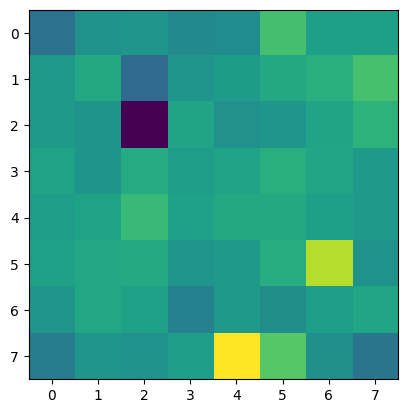

In [ ]:
def database1(t,h,w, db1):
  img1 = db1.loc[t,'MA1':'MN9'].values.reshape(9,14)
  resized1 = resize(img1, (h,w), anti_aliasing=True)
  plt.figure()
  plt.imshow(resized1)
  plt.show()

  return resized1 

database1(100,8,8)

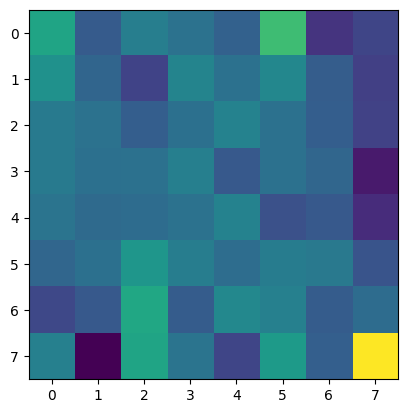

In [ ]:
def database2(t):
  plt.imshow(db2['emg_extensors'][t])

database2(1000)

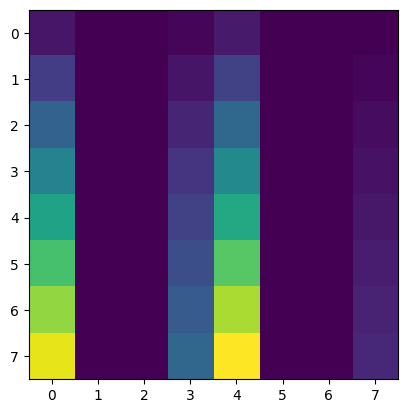

In [ ]:
# sem t. checar untitled [5].

img5 = db5.loc['0':'7'].values.reshape(35,20)
resized5 = resize(img5, (8,8), anti_aliasing=True)
plt.figure()
plt.imshow(resized5)
plt.show()

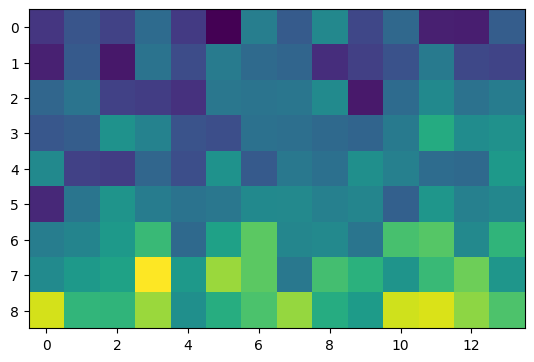

In [15]:
db3 = loadmat(path+'seeds/subj01/detop_exp01_subj01_Sess1_01_01.mat')
emg = db3['emg'][:126,:]
plt.imshow(emg[:,0].reshape(9,14))